## Capstone Project - The Battle of Neighborhoods (Week 1)

In [130]:
!pip install requests
!pip install html5lib
!pip install geopy

In [549]:
import requests as requests
import pandas as pd
import html5lib
from pandas import DataFrame
from geopy.geocoders import Nominatim
import numpy as np
import matplotlib.pyplot as plt

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

## 1. Data Preparation

In [247]:
## URL to extract City neighbourhood information
urlS = "https://en.wikipedia.org/wiki/Shanghai"
urlG = "https://en.wikipedia.org/wiki/Guangzhou"

pageShanghai = requests.get(urlS)
pageGuangzhou = requests.get(urlG)

# print("Extracted {num} wikitables from Shanghai Wikitables".format(num = len(wikitablesS)))

In [248]:
wikitablesS = pd.read_html(pageShanghai.text, match = "Administrative divisions of Shanghai")
dfS = wikitablesS[0]
dfS.drop(dfS.index[0:3], axis = 0, inplace = True)
dfS.drop(["Administrative divisions of Shanghai.6","Administrative divisions of Shanghai.7"], axis = 1, inplace = True)
dfS.columns = ["DivisionCode", "Division", "Area(km2)", "Totalpopulation2017", "Seat", "PostalCode"]
dfS.reset_index(drop = True)
dfS["City"] = "Shanghai"
dfS

,DivisionCode,Division,Area(km2),Totalpopulation2017,Seat,PostalCode,City
3,310101,Huangpu,20.46,654800,Waitan Subdistrict,200001,Shanghai
4,310104,Xuhui,54.76,1088300,Xujiahui Subdistrict,200030,Shanghai
5,310105,Changning,38.30,693700,Jiangsu Road Subdistrict,200050,Shanghai
6,310106,Jing'an,36.88,1066200,Jiangning Road Subdistrict,200040,Shanghai
7,310107,Putuo,54.83,1284700,Zhenru Town Subdistrict,200333,Shanghai
8,310109,Hongkou,23.46,799000,Jiaxing Road Subdistrict,200080,Shanghai
9,310110,Yangpu,60.73,1313400,Pingliang Road Subdistrict,200082,Shanghai
10,310112,Minhang,370.75,2534300,Xinzhuang town,201100,Shanghai
11,310113,Baoshan,270.99,2030800,Youyi Road Subdistrict,201900,Shanghai
12,310114,Jiading,464.20,1581800,Xincheng Road Subdistrict,201800,Shanghai


In [249]:
dfG = pd.read_html(pageGuangzhou.text, match = "Administrative divisions of Guangzhou")
dfG = dfG[0]
dfG.drop(dfG.columns[6:11], axis =1, inplace = True)
dfG.drop(dfG.index[16:31], axis =0, inplace = True)
dfG.drop(dfG.index[0:5], axis =0, inplace = True)
dfG.columns = ["DivisionCode", "Division", "Area(km2)", "Totalpopulation2017", "Seat", "PostalCode"]
dfG.reset_index(drop=False)
dfG["City"] = "Guangzhou"

In [176]:
dfG

,DivisionCode,Division,Area(km2),Totalpopulation2017,Seat,PostalCode,City
5,440103,Liwan,59.10,898200,Shiweitang Subdistrict,510000,Guangzhou
6,440104,Yuexiu,33.80,1157666,Beijing Subdistrict,510000,Guangzhou
7,440105,Haizhu,90.40,1558663,Jianghai Subdistrict,510000,Guangzhou
8,440106,Tianhe,96.33,1432426,Tianyuan Subdistrict,510000,Guangzhou
9,440111,Baiyun,795.79,2223150,Jingtai Subdistrict,510000,Guangzhou
10,440112,Huangpu,484.17,831586,Luogang Subdistrict,510500,Guangzhou
11,440113,Panyu,529.94,1764828,Shiqiao Subdistrict,511400,Guangzhou
12,440114,Huadu,970.04,945005,Huacheng Subdistrict,510800,Guangzhou
13,440115,Nansha,783.86,259900,Huangge Town,511400,Guangzhou
14,440117,Conghua,1974.50,593415,Jiekou Subdistrict,510900,Guangzhou


In [250]:
app = Nominatim(user_agent='Meng')

In [274]:
app = Nominatim(user_agent='Meng')

def geos(df):
    div = []
    division = df["Division"] + "," + df["City"]
    for geo in division:
        lat = (app.geocode(geo).raw["lat"])
        lon = (app.geocode(geo).raw["lon"])
        div.append([geo.split(',')[0],lat, lon])
    
    geolocations = pd.DataFrame(div)
    geolocations.columns = ["Division", "lat", "lon"]
    return pd.merge(df, geolocations, on = "Division")

In [306]:
dfgeoS = geos(dfS)

In [307]:
dfgeoS

,DivisionCode,Division,Area(km2),Totalpopulation2017,Seat,PostalCode,City,lat,lon
0,310101,Huangpu,20.46,654800,Waitan Subdistrict,200001,Shanghai,31.2322758,121.4692071
1,310104,Xuhui,54.76,1088300,Xujiahui Subdistrict,200030,Shanghai,31.163698,121.4279938
2,310105,Changning,38.30,693700,Jiangsu Road Subdistrict,200050,Shanghai,31.2092762,121.3899859
3,310106,Jing'an,36.88,1066200,Jiangning Road Subdistrict,200040,Shanghai,31.2297756,121.44306
4,310107,Putuo,54.83,1284700,Zhenru Town Subdistrict,200333,Shanghai,31.2513263,121.3912291
5,310109,Hongkou,23.46,799000,Jiaxing Road Subdistrict,200080,Shanghai,31.266703,121.501751
6,310110,Yangpu,60.73,1313400,Pingliang Road Subdistrict,200082,Shanghai,31.2620112,121.5214305
7,310112,Minhang,370.75,2534300,Xinzhuang town,201100,Shanghai,31.1147666,121.3769429
8,310113,Baoshan,270.99,2030800,Youyi Road Subdistrict,201900,Shanghai,31.4066338,121.4851577
9,310114,Jiading,464.20,1581800,Xincheng Road Subdistrict,201800,Shanghai,31.377756,121.2606119


In [303]:
dfgeoG = geos(dfG)

In [304]:
dfgeoG

,DivisionCode,Division,Area(km2),Totalpopulation2017,Seat,PostalCode,City,lat,lon
0,440103,Liwan,59.10,898200,Shiweitang Subdistrict,510000,Guangzhou,23.128625,113.239199
1,440104,Yuexiu,33.80,1157666,Beijing Subdistrict,510000,Guangzhou,23.1315432,113.2614774
2,440105,Haizhu,90.40,1558663,Jianghai Subdistrict,510000,Guangzhou,23.0859958,113.3119935
3,440106,Tianhe,96.33,1432426,Tianyuan Subdistrict,510000,Guangzhou,23.12712,113.356424
4,440111,Baiyun,795.79,2223150,Jingtai Subdistrict,510000,Guangzhou,23.1606324,113.267895
5,440112,Huangpu,484.17,831586,Luogang Subdistrict,510500,Guangzhou,23.1824507,113.4760861
6,440113,Panyu,529.94,1764828,Shiqiao Subdistrict,511400,Guangzhou,22.9387253,113.3785422
7,440114,Huadu,970.04,945005,Huacheng Subdistrict,510800,Guangzhou,23.4612392,113.2141965
8,440115,Nansha,783.86,259900,Huangge Town,511400,Guangzhou,22.8043913,113.5198188
9,440117,Conghua,1974.50,593415,Jiekou Subdistrict,510900,Guangzhou,23.670764,113.6934958


## 2. Exploratory Data Analysis

In [325]:
CLIENT_ID = "UGLKZDFET1QXPMKQ0MVT0HAZ4P51KF5OHB54DEILWDM14UKM"
CLIENT_SECRET = "0TXRNOREB4FMHHLHJ1I4LU404AY2T1RA4Q02EQXL0X0CAHLG"
LIMIT = 1000 # limit of number of venues returned by Foursquare API
radius = 5000 # define radius
VERSION = "20180605"
lat = 23.128625
lng = 113.239199

In [327]:
        
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    results = requests.get(url).json()

In [334]:
results["response"]["groups"][0]["items"][0]["venue"]

{'id': '4da53e6f43a17958bea05467',
 'name': "Chen's Lineage Hall (陈氏书院)",
 'location': {'address': '荔湾区中山七路',
  'lat': 23.12914120144472,
  'lng': 113.23945969859366,
  'labeledLatLngs': [{'label': 'display',
    'lat': 23.12914120144472,
    'lng': 113.23945969859366}],
  'distance': 63,
  'cc': 'CN',
  'city': '广州',
  'state': '广东',
  'country': '中国',
  'formattedAddress': ['荔湾区中山七路', '广州', '广东', '中国']},
 'categories': [{'id': '4bf58dd8d48988d190941735',
   'name': 'History Museum',
   'pluralName': 'History Museums',
   'shortName': 'History Museum',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/museum_history_',
    'suffix': '.png'},
   'primary': True}],
 'photos': {'count': 0, 'groups': []}}

In [297]:
## Extracting Foursquare venue data


def getNearbyVenues(names, latitudes, longitudes, radius=radius):
    
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Division', 
                  'Division Latitude', 
                  'Division Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)
    


In [298]:
# Get Guangzhou's venues data
print("Getting venues inside the following Boroughs of Guangzhou:")
Guangzhou_venues = getNearbyVenues(names=dfgeoG['Division'],
                                   latitudes=dfgeoG['lat'],
                                   longitudes=dfgeoG['lon']
                                  )
Guangzhou_venues

Getting venues inside the following Boroughs of Guangzhou:
Liwan
Yuexiu
Haizhu
Tianhe
Baiyun
Huangpu
Panyu
Huadu
Nansha
Conghua
Zengcheng


,Division,Division Latitude,Division Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Liwan,23.128625,113.239199,Chen's Lineage Hall (陈氏书院),23.129141,113.239460,History Museum
1,Liwan,23.128625,113.239199,Liu Hua Park (流花湖公园),23.139302,113.246531,Park
2,Liwan,23.128625,113.239199,點都德,23.125928,113.241140,Cantonese Restaurant
3,Liwan,23.128625,113.239199,Shamian Island (沙面岛),23.110614,113.237605,Island
4,Liwan,23.128625,113.239199,Lizhi Wan (荔枝湾),23.123997,113.232286,Lake
...,...,...,...,...,...,...,...
526,Conghua,23.670764,113.6934958,文轩苑,23.700005,113.708089,Hotel Pool
527,Conghua,23.670764,113.6934958,碧水湾度假温泉,23.702775,113.711407,Hotel
528,Conghua,23.670764,113.6934958,华伦泥焗鸡,23.702125,113.714087,Chinese Restaurant
529,Conghua,23.670764,113.6934958,仙溪美食农庄,23.643245,113.655577,Cantonese Restaurant


In [308]:
# Get Shanghai's venues data
print("Getting venues inside the following Boroughs of Shanghai:")
Shanghai_venues = getNearbyVenues(names=dfgeoS['Division'],
                                   latitudes=dfgeoS['lat'],
                                   longitudes=dfgeoS['lon']
                                  )
Shanghai_venues

Getting venues inside the following Boroughs of Shanghai:
Huangpu
Xuhui
Changning
Jing'an
Putuo
Hongkou
Yangpu
Minhang
Baoshan
Jiading
Pudong
Jinshan
Songjiang
Qingpu
Fengxian
Chongming


,Division,Division Latitude,Division Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Huangpu,31.2322758,121.4692071,Shanghai Grand Theater (上海大剧院),31.231030,121.467263,Theater
1,Huangpu,31.2322758,121.4692071,JW Marriott Hotel Shanghai at Tomorrow Square ...,31.232216,121.465260,Hotel
2,Huangpu,31.2322758,121.4692071,Le Royal Club Lounge,31.236404,121.471364,Lounge
3,Huangpu,31.2322758,121.4692071,Jing'an Sculpture Park (静安雕塑公园),31.234794,121.463911,Sculpture Garden
4,Huangpu,31.2322758,121.4692071,Green Massage (青籁养生),31.225242,121.469261,Spa
...,...,...,...,...,...,...,...
934,Fengxian,30.9204487,121.4693834,NanJiao Hotel (南郊宾馆),30.926923,121.479087,Hotel
935,Fengxian,30.9204487,121.4693834,绿地逸东(华)酒店 Eaton Luxe Hotel,30.943799,121.456400,Hotel
936,Chongming,31.6313393,121.5337768,祥雨综合商店,31.613174,121.529125,Convenience Store
937,Chongming,31.6313393,121.5337768,新龙城酒家,31.626873,121.483897,Chinese Restaurant


In [463]:
## Picking major districts inside inner London and inner Paris respectively
# districtsL = ['City of London','Westminster','Kensington and Chelsea','Hammersmith and Fulham', 'Wandsworth']
# districtsP = ['Louvre, Bourse, Temple, Hôtel-de-Ville', 'Panthéon', 'Luxembourg', 'Palais-Bourbon', 'Élysée']

def nearbyvenues_count(venues_df, district):
    venues_count = venues_df
    venues_count = venues_count.rename(columns={'Venue Category': 'Category'})
    venues_count = venues_count.groupby(['Division']).Category.value_counts().to_frame("Counts")
    fig, ax = plt.subplots(1,1,figsize=(20, 7)) 
    fig.subplots_adjust(left=0.115, right=0.88)
    venues_plot =  venues_count['Counts'].loc[district][:10].head(10) 
    pos = np.arange(len(venues_plot))
    ax.set_title(district,size=20)
    freqchart = ax.barh(pos, venues_plot,align='center',height=0.5,tick_label=venues_plot.index)
    
    return freqchart

In [544]:
Shanghai_venues = Shanghai_venues.rename(columns = {'Venue Category': 'Category'})
Shanghai_Restaurant = Shanghai_venues[Shanghai_venues["Category"].str.contains("Restaurant")].reset_index()
Shanghai_Restaurant.loc[:,'Category'] = "Restaurant"
Shanghai_Restaurant = Shanghai_Restaurant.groupby(['Division']).Category.value_counts().to_frame("Counts")
Shanghai_Restaurant

,,Counts
Division,Category,
Baoshan,Restaurant,2
Changning,Restaurant,39
Chongming,Restaurant,1
Hongkou,Restaurant,25
Huangpu,Restaurant,26
Jing'an,Restaurant,30
Minhang,Restaurant,13
Pudong,Restaurant,24
Putuo,Restaurant,38


In [545]:
Guangzhou_venues = Guangzhou_venues.rename(columns = {'Venue Category': 'Category'})
Guangzhou_Restaurant = Guangzhou_venues[Guangzhou_venues["Category"].str.contains("Restaurant")].reset_index()
Guangzhou_Restaurant.loc[:,'Category'] = "Restaurant"
Guangzhou_Restaurant = Guangzhou_Restaurant.groupby(['Division']).Category.value_counts().to_frame("Counts")
Guangzhou_Restaurant

,,Counts
Division,Category,
Baiyun,Restaurant,31
Conghua,Restaurant,2
Haizhu,Restaurant,28
Huadu,Restaurant,1
Liwan,Restaurant,31
Panyu,Restaurant,3
Tianhe,Restaurant,26
Yuexiu,Restaurant,28
Zengcheng,Restaurant,1


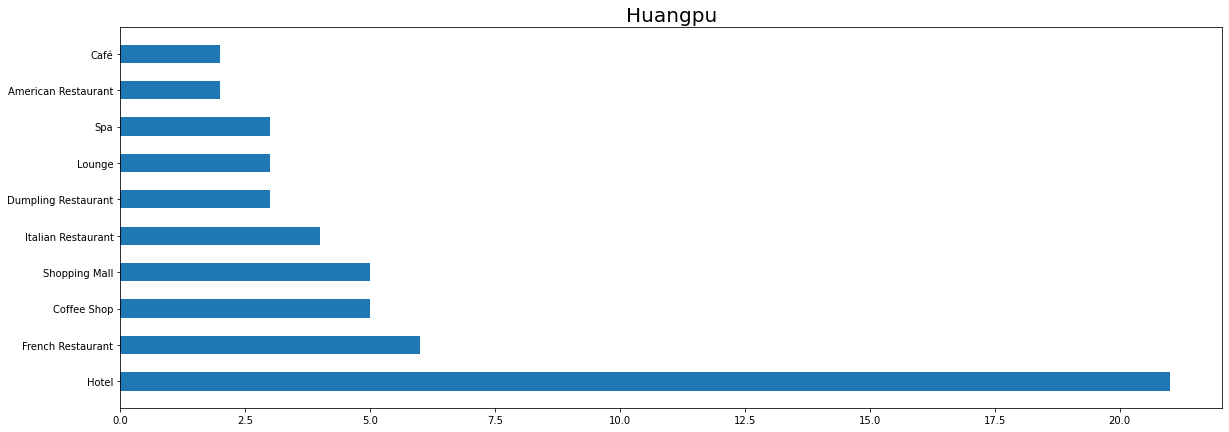

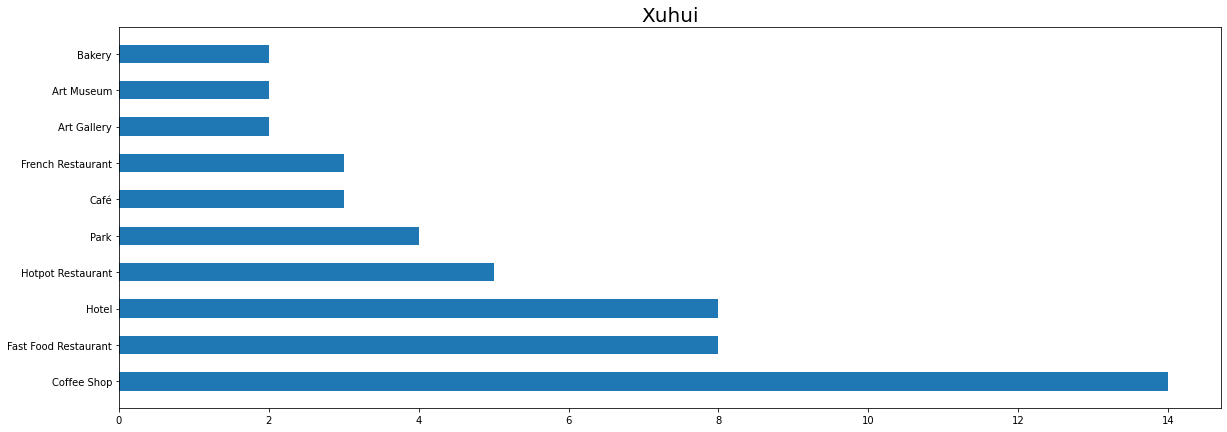

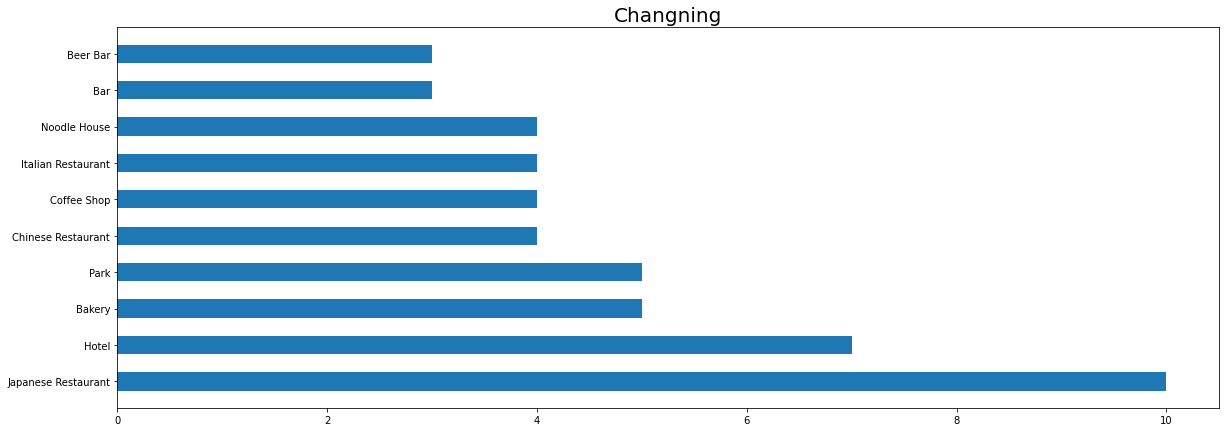

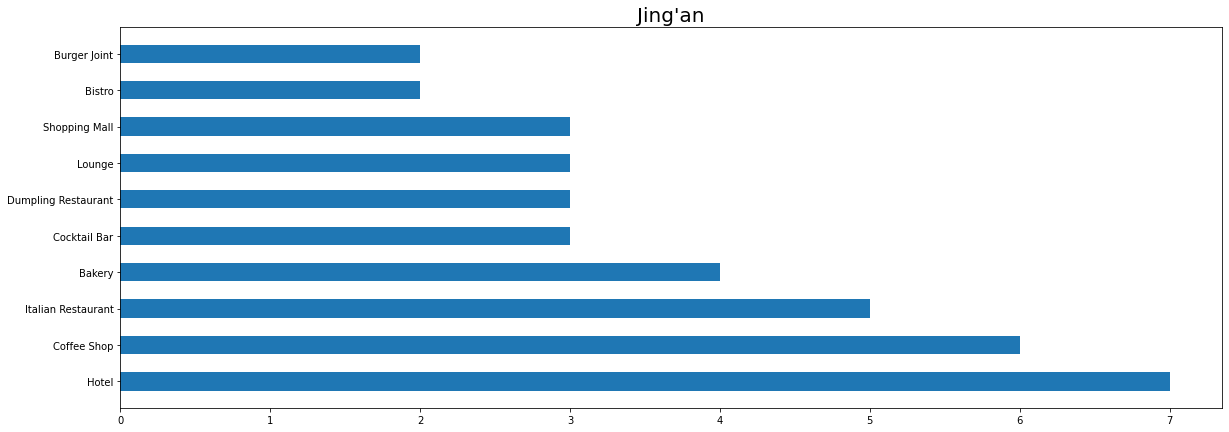

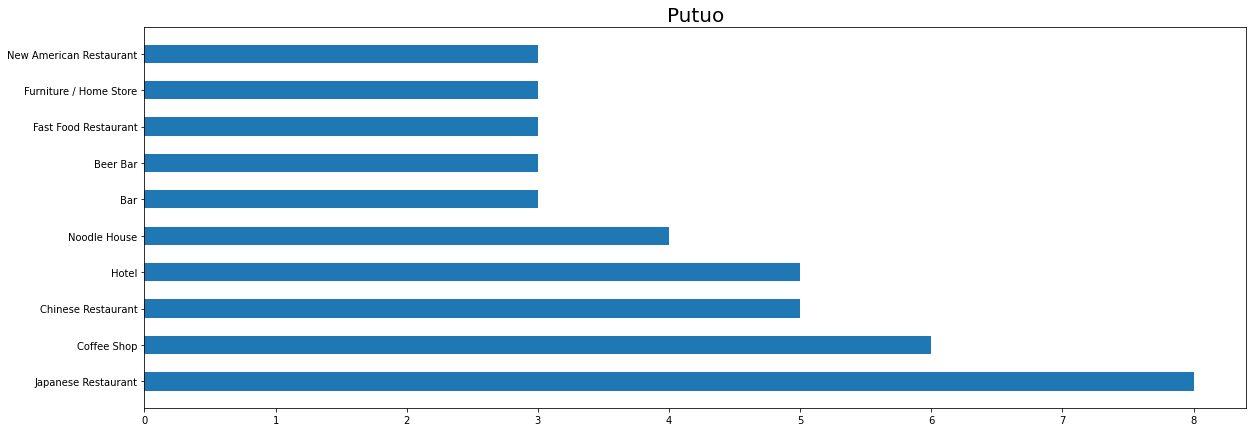

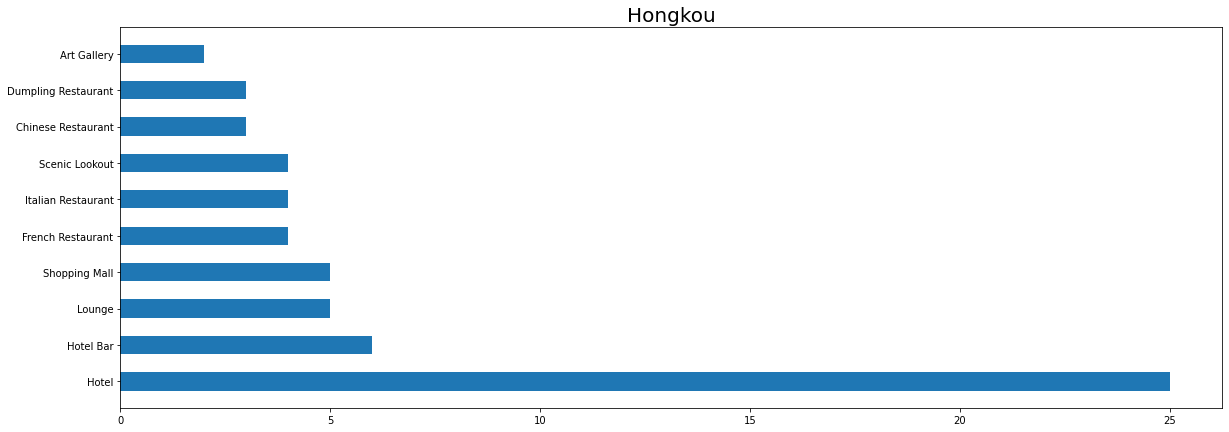

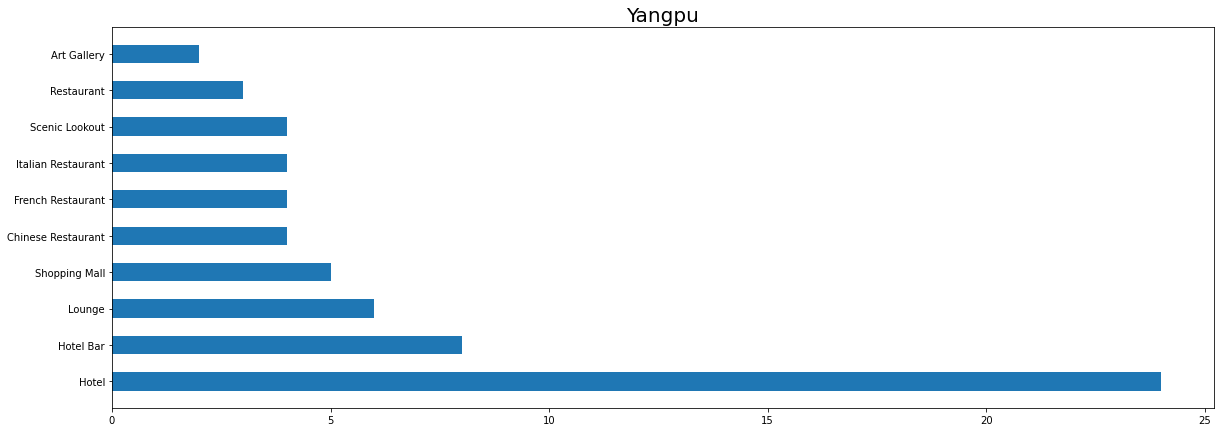

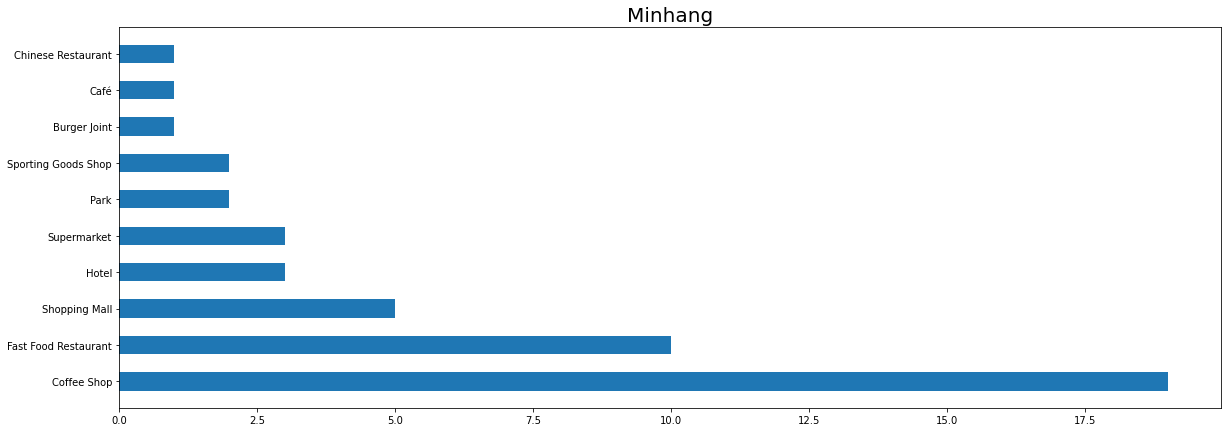

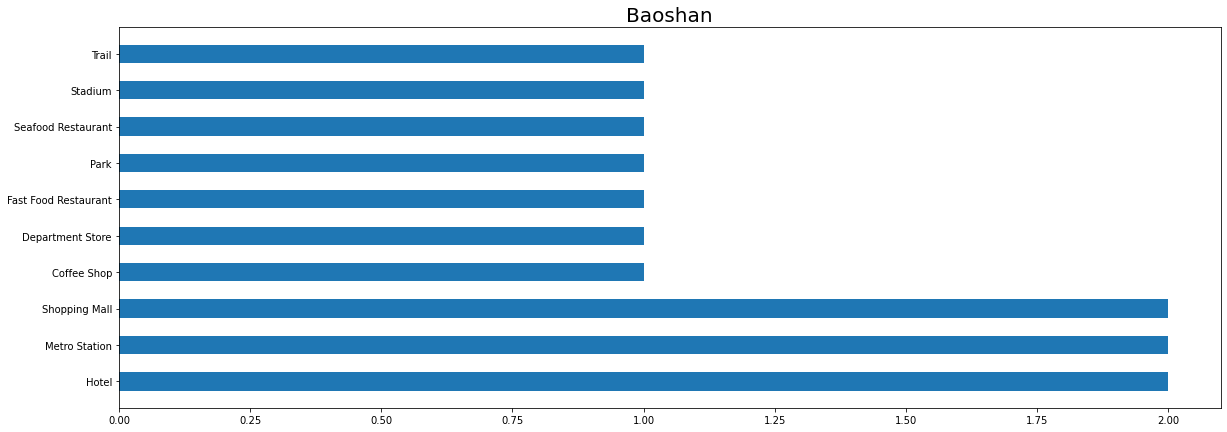

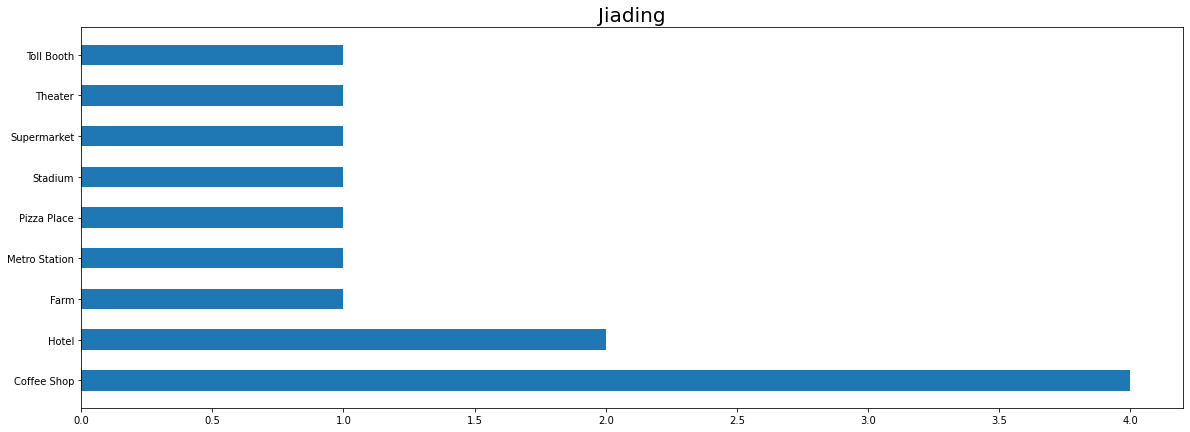

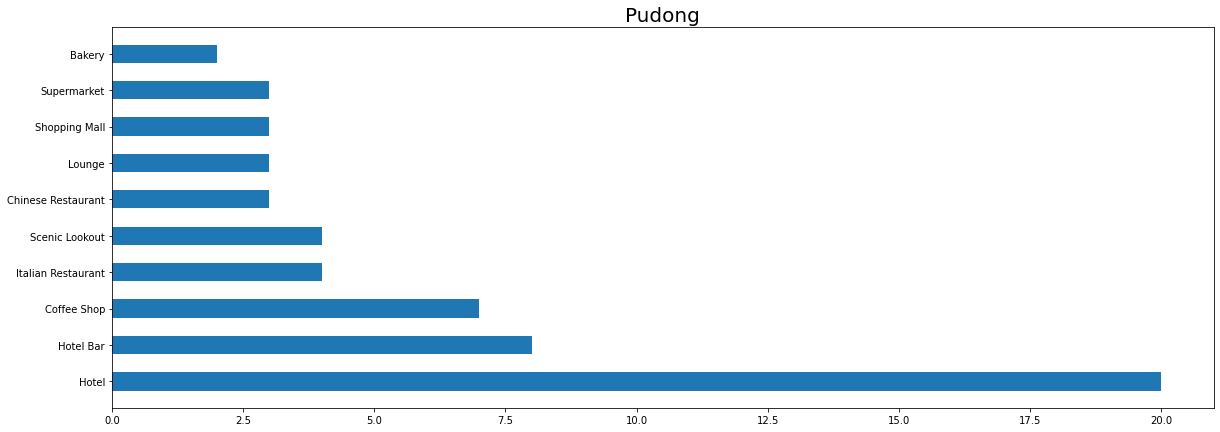

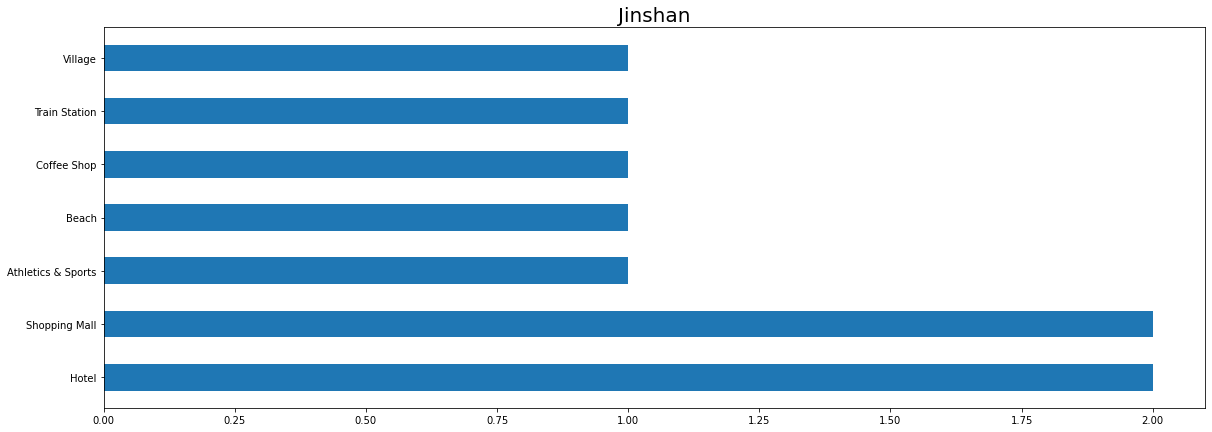

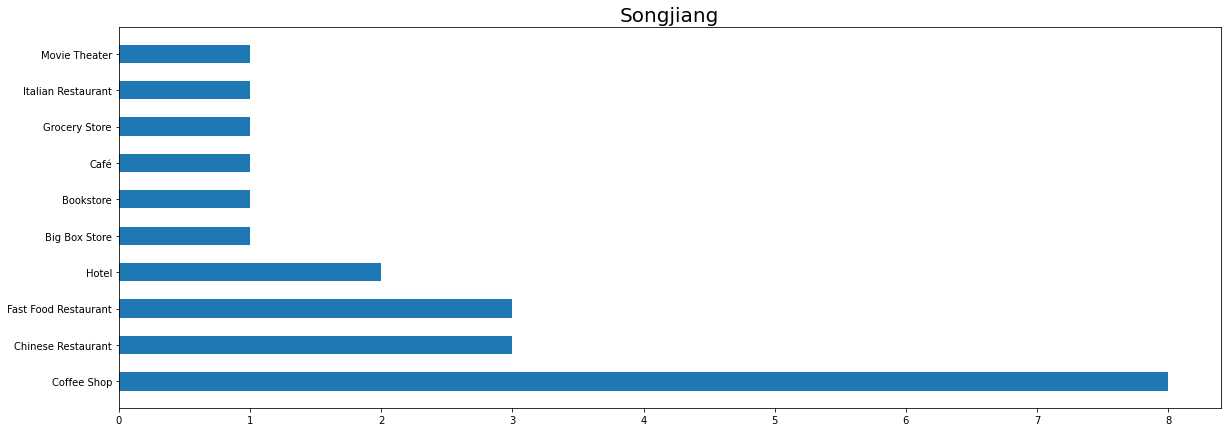

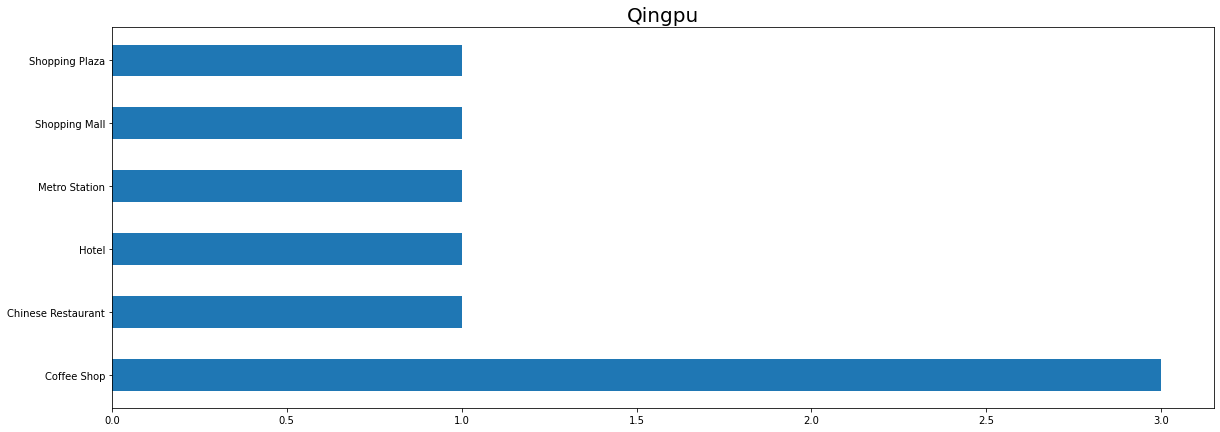

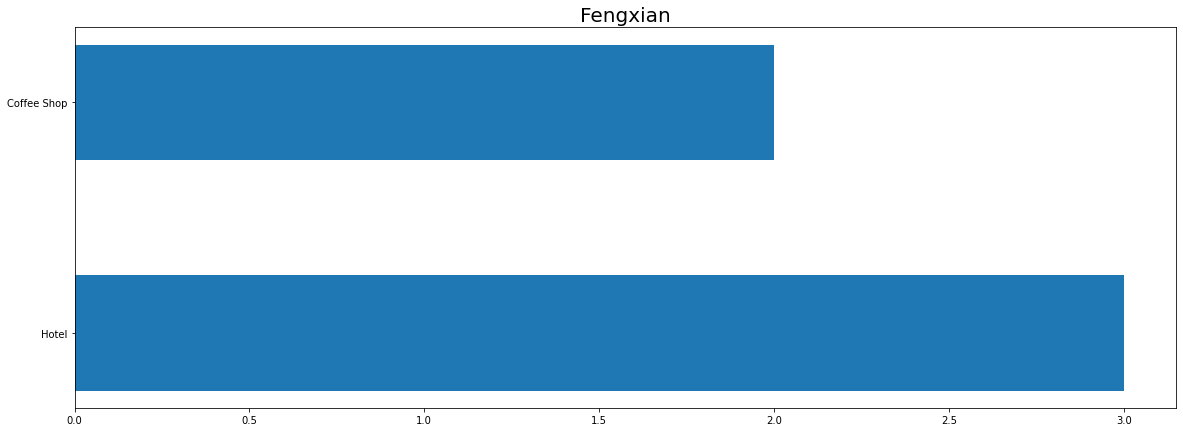

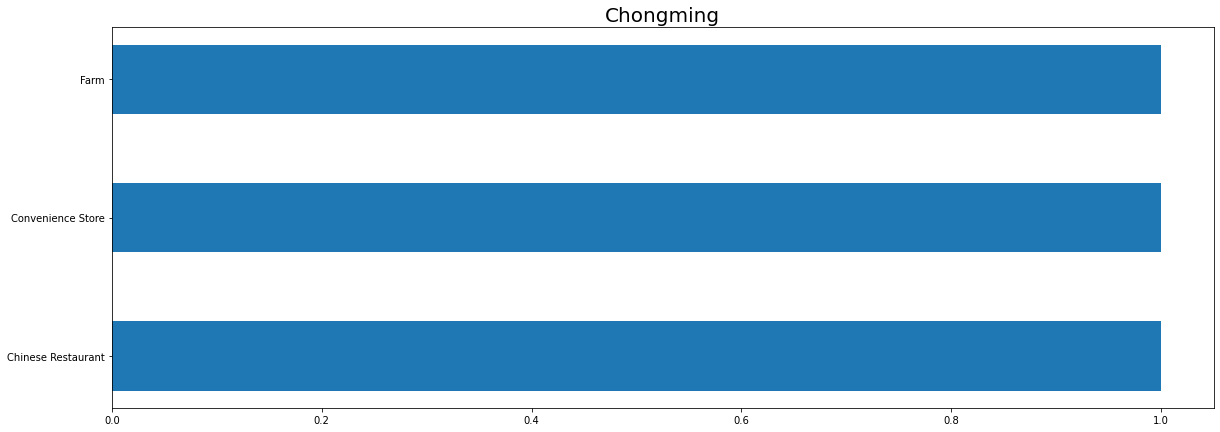

In [464]:
divisions = Shanghai_venues['Division'].unique()
divisions
for division in divisions:
    nearbyvenues_count(Shanghai_venues, division)

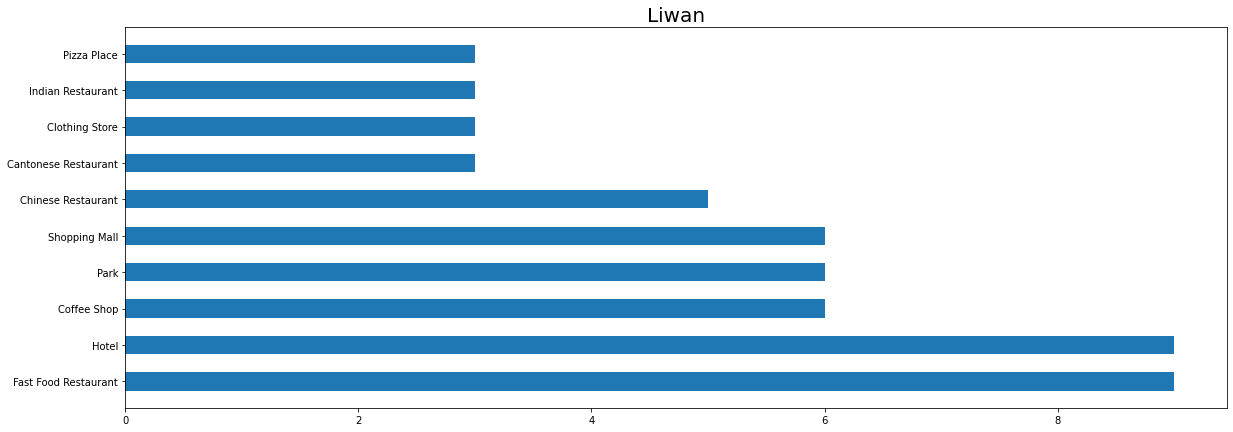

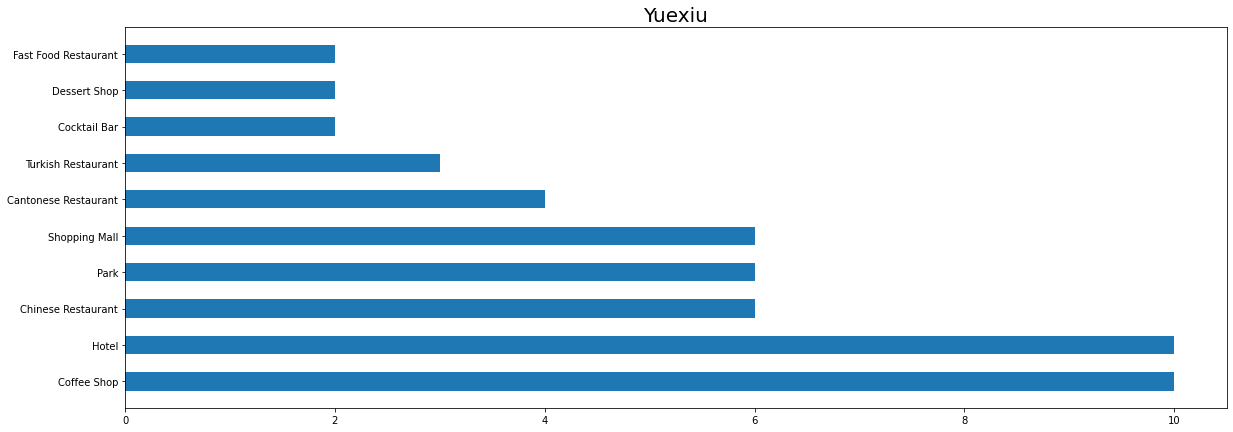

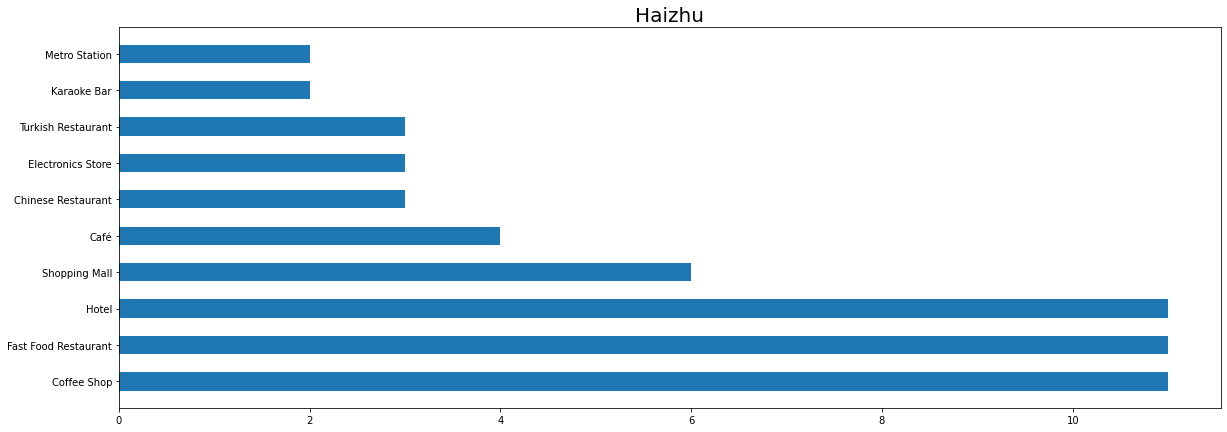

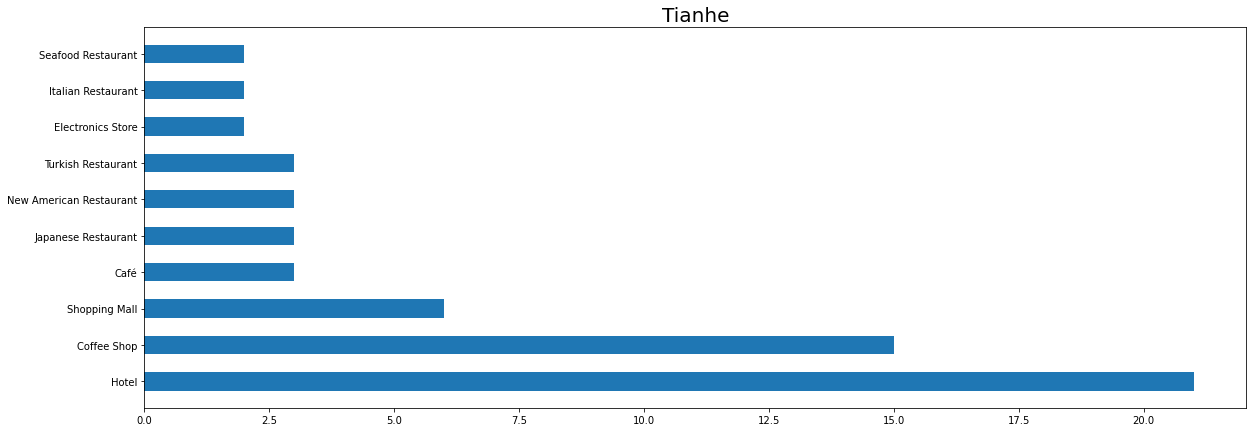

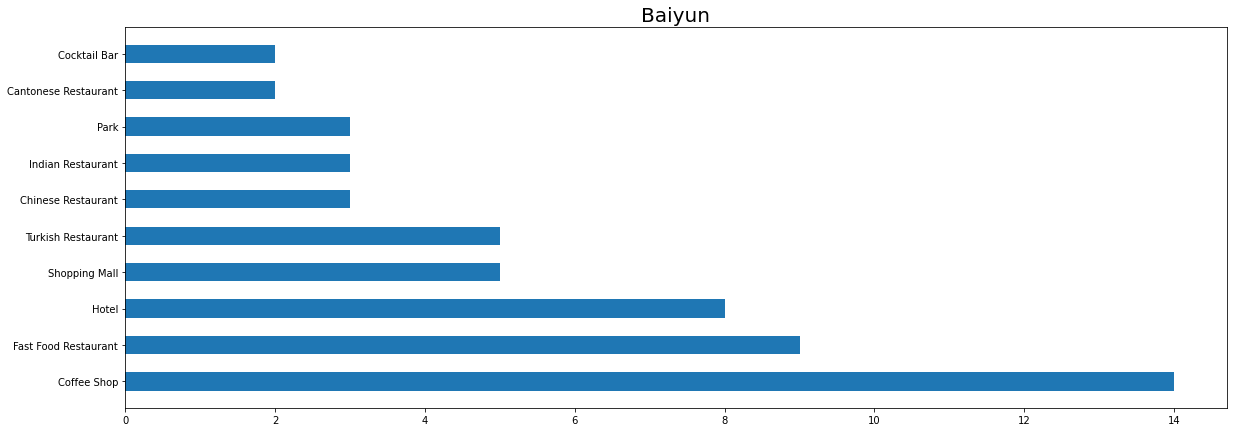

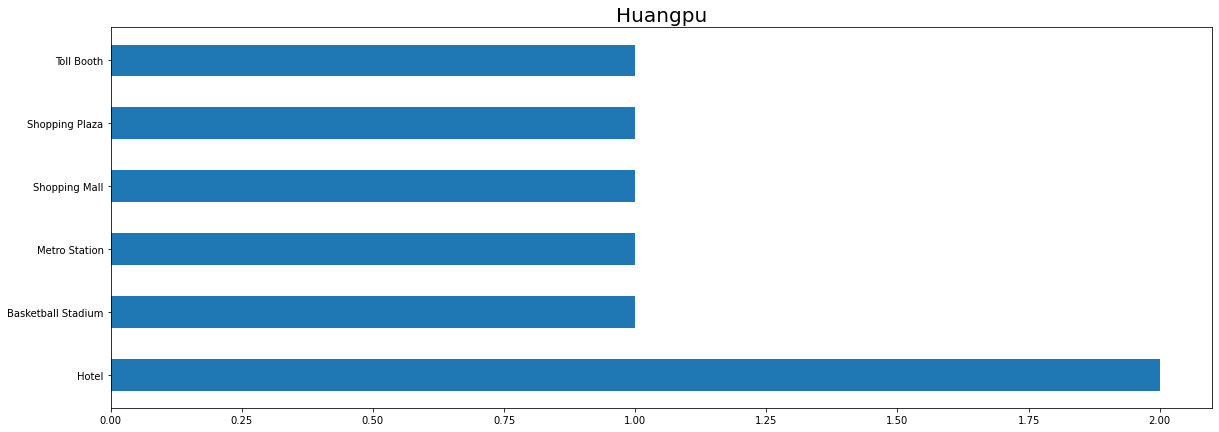

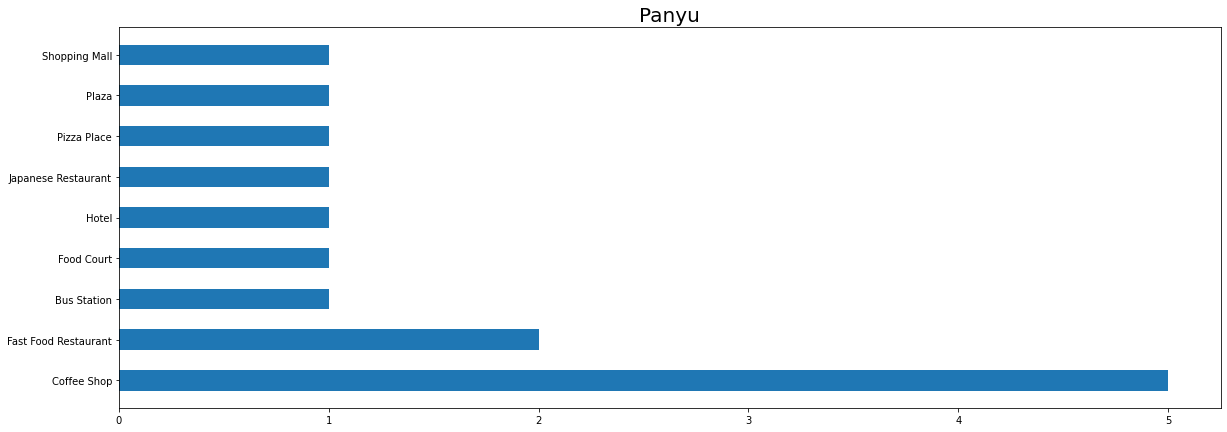

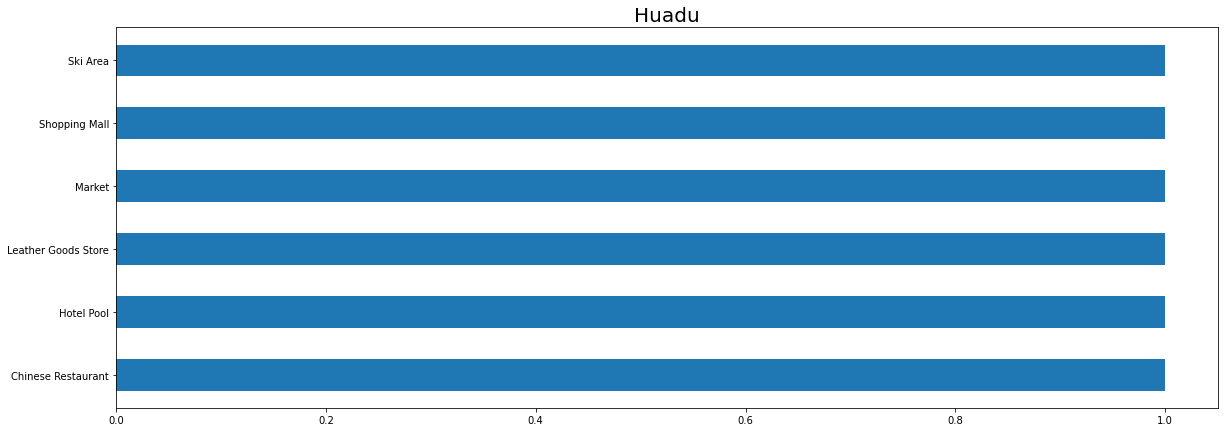

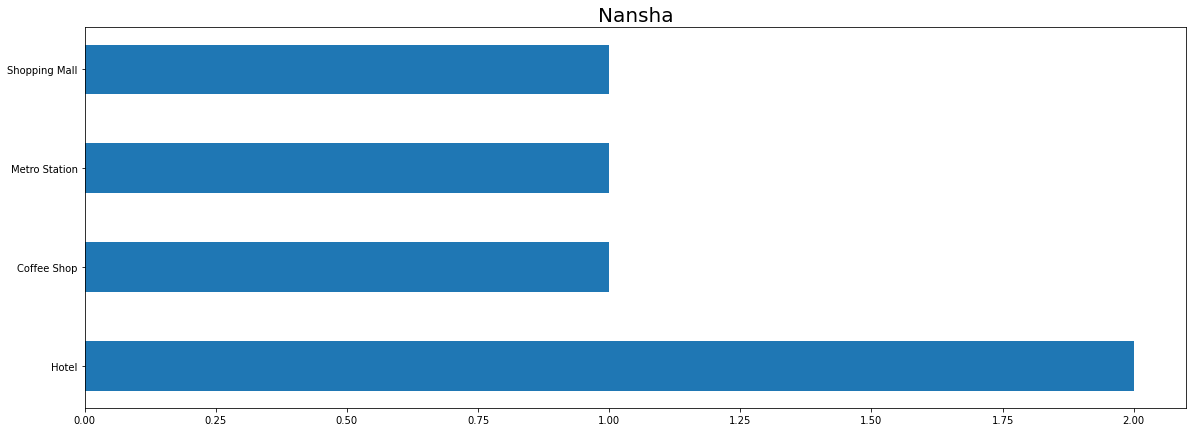

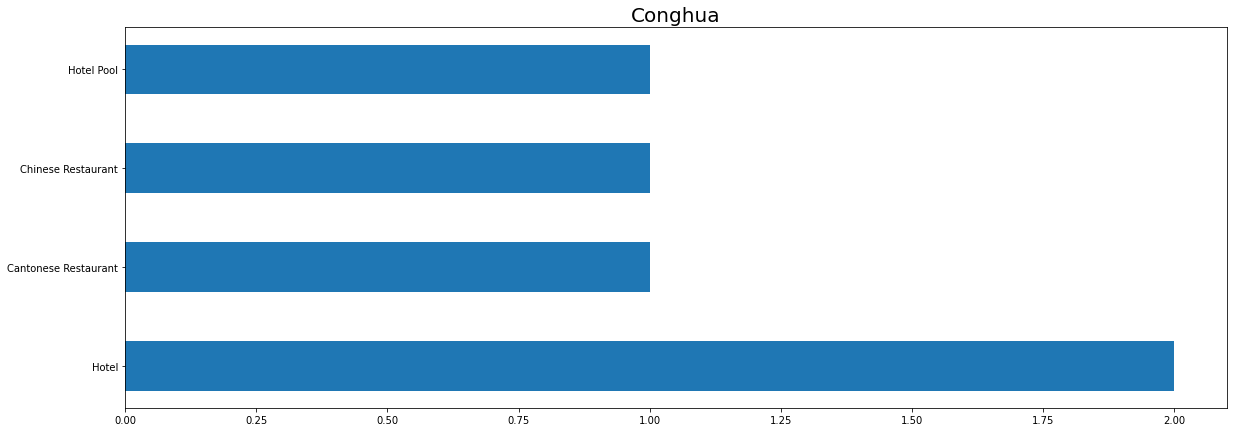

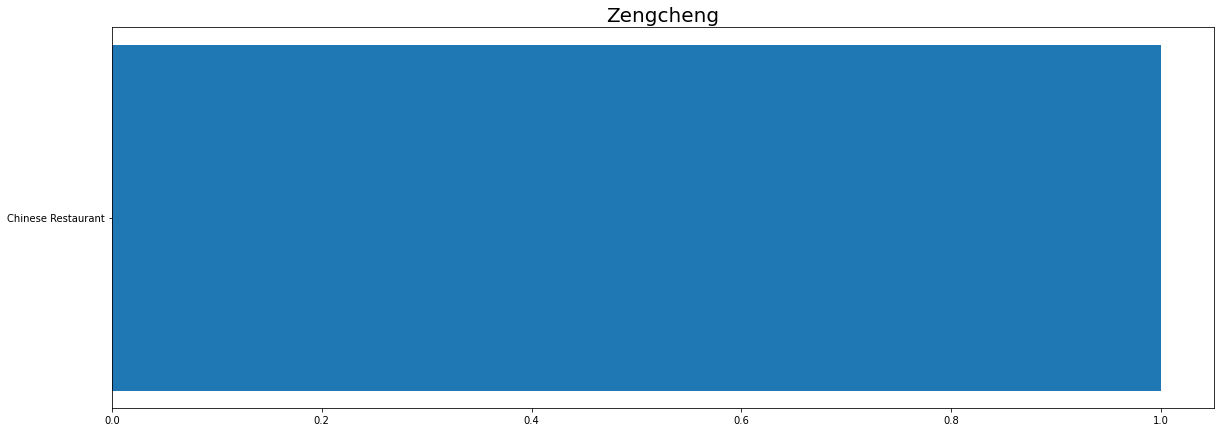

In [469]:
divisions = Guangzhou_venues['Division'].unique()
divisions
for division in divisions:
    nearbyvenues_count(Guangzhou_venues, division)

In [348]:
Guangzhou_onehot = pd.get_dummies(Guangzhou_venues[['Venue Category']], prefix="", prefix_sep="")
Guangzhou_onehot['Division'] = Guangzhou_venues["Division"]

In [381]:
fixed_columns = [Guangzhou_onehot.columns[-1]] + list(Guangzhou_onehot.columns[:-1])
Guangzhou_onehot = Guangzhou_onehot[fixed_columns]
Guangzhou_grouped = Guangzhou_onehot.groupby('Division').mean().reset_index()
Guangzhou_grouped.iloc[0:]

,Division,Temple,Theme Park Ride / Attraction,Toll Booth,Toy / Game Store,Turkish Restaurant,Vietnamese Restaurant,Warehouse Store,Watch Shop,Women's Store,...,Shopping Mall,Shopping Plaza,Ski Area,Snack Place,Soup Place,Spa,Stadium,Supermarket,Sushi Restaurant,Tea Room
0,Baiyun,0.01,0.000000,0.000000,0.000000,0.050000,0.01,0.01,0.01,0.01,...,0.050000,0.000000,0.000000,0.02,0.01,0.02,0.01,0.00,0.00,0.000000
1,Conghua,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
2,Haizhu,0.00,0.010753,0.000000,0.010753,0.032258,0.00,0.00,0.00,0.00,...,0.064516,0.010753,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.010753
3,Huadu,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,...,0.166667,0.000000,0.166667,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
4,Huangpu,0.00,0.000000,0.142857,0.000000,0.000000,0.00,0.00,0.00,0.00,...,0.142857,0.142857,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
5,Liwan,0.01,0.000000,0.000000,0.000000,0.030000,0.01,0.01,0.01,0.01,...,0.060000,0.000000,0.000000,0.02,0.01,0.00,0.00,0.00,0.00,0.000000
6,Nansha,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,...,0.200000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
7,Panyu,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,...,0.071429,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
8,Tianhe,0.00,0.010000,0.000000,0.000000,0.030000,0.01,0.00,0.00,0.00,...,0.060000,0.010000,0.000000,0.00,0.00,0.00,0.00,0.01,0.02,0.010000
9,Yuexiu,0.01,0.000000,0.000000,0.000000,0.030000,0.01,0.01,0.01,0.01,...,0.060000,0.000000,0.000000,0.02,0.01,0.00,0.00,0.00,0.00,0.000000


In [328]:
results

{'meta': {'code': 200, 'requestId': '60ac3e4e2916aa089d98c297'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Guangzhou',
  'headerFullLocation': 'Guangzhou',
  'headerLocationGranularity': 'city',
  'totalResults': 123,
  'suggestedBounds': {'ne': {'lat': 23.173625045000044,
    'lng': 113.28804065465317},
   'sw': {'lat': 23.083624954999955, 'lng': 113.19035734534683}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4da53e6f43a17958bea05467',
       'name': "Chen's Lineage Hall (陈氏书院)",
       'location': {'address': '荔湾区中山七路',
        'lat': 23.12914120144472,
        'lng': 113.23945969859366,
        'labeledLatLngs': [{'label': 'display',
          'lat': 23.1291412014447

In [321]:
## Categorizing venues into pandas
# one hot encoding
Guangzhou_onehot = pd.get_dummies(Guangzhou_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Guangzhou_onehot['Division'] = Guangzhou_venues["Division"]

# move neighborhood column to the first column
fixed_columns = [Guangzhou_onehot.columns[-1]] + list(Guangzhou_onehot.columns[:-1])
Guangzhou_onehot = Guangzhou_onehot[fixed_columns]
Guangzhou_onehot.head()
Guangzhou_grouped = Guangzhou_onehot.groupby('Division').mean().reset_index()
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Division']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe for Guangzhou
Guangzhouboroughs_venues_sorted = pd.DataFrame(columns=columns)
Guangzhouboroughs_venues_sorted['Division'] = Guangzhou_grouped['Division']
for ind in np.arange(Guangzhou_grouped.shape[0]):
    Guangzhouboroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Guangzhou_grouped.iloc[ind, :], num_top_venues)

Guangzhouboroughs_venues_sorted.head(10)

,Division,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baiyun,Coffee Shop,Fast Food Restaurant,Hotel,Turkish Restaurant,Shopping Mall,Indian Restaurant,Park,Chinese Restaurant,Cocktail Bar,Cantonese Restaurant
1,Conghua,Hotel,Cantonese Restaurant,Hotel Pool,Chinese Restaurant,Art Gallery,Plaza,Pizza Place,Pedestrian Plaza,Park,Other Great Outdoors
2,Haizhu,Hotel,Fast Food Restaurant,Coffee Shop,Shopping Mall,Café,Turkish Restaurant,Electronics Store,Chinese Restaurant,Mexican Restaurant,Metro Station
3,Huadu,Leather Goods Store,Market,Hotel Pool,Shopping Mall,Ski Area,Chinese Restaurant,Art Gallery,New American Restaurant,Pizza Place,Pedestrian Plaza
4,Huangpu,Hotel,Basketball Stadium,Metro Station,Toll Booth,Shopping Mall,Shopping Plaza,Art Gallery,Multiplex,Pedestrian Plaza,Park
5,Liwan,Hotel,Fast Food Restaurant,Coffee Shop,Shopping Mall,Park,Chinese Restaurant,Pizza Place,Turkish Restaurant,Clothing Store,Indian Restaurant
6,Nansha,Hotel,Metro Station,Coffee Shop,Shopping Mall,Art Gallery,Museum,Pizza Place,Pedestrian Plaza,Park,Other Great Outdoors
7,Panyu,Coffee Shop,Fast Food Restaurant,Plaza,Pizza Place,Japanese Restaurant,Food Court,Shopping Mall,Hotel,Bus Station,New American Restaurant
8,Tianhe,Hotel,Coffee Shop,Shopping Mall,Japanese Restaurant,Turkish Restaurant,New American Restaurant,Café,Electronics Store,Seafood Restaurant,Italian Restaurant
9,Yuexiu,Hotel,Coffee Shop,Chinese Restaurant,Park,Shopping Mall,Cantonese Restaurant,Turkish Restaurant,History Museum,Fast Food Restaurant,Dessert Shop


In [382]:
## Categorizing venues into pandas
# one hot encoding
Shanghai_onehot = pd.get_dummies(Shanghai_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Shanghai_onehot['Division'] = Shanghai_venues["Division"]

# move neighborhood column to the first column
fixed_columns = [Shanghai_onehot.columns[-1]] + list(Shanghai_onehot.columns[:-1])
Shanghai_onehot = Shanghai_onehot[fixed_columns]
Shanghai_onehot.head()
Shanghai_grouped = Shanghai_onehot.groupby('Division').mean().reset_index()
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Division']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe for Shanghai
Shanghaiboroughs_venues_sorted = pd.DataFrame(columns=columns)
Shanghaiboroughs_venues_sorted['Division'] = Shanghai_grouped['Division']
for ind in np.arange(Shanghai_grouped.shape[0]):
    Shanghaiboroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Shanghai_grouped.iloc[ind, :], num_top_venues)

Shanghaiboroughs_venues_sorted.head(10)

,Division,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baoshan,Hotel,Metro Station,Shopping Mall,Park,Seafood Restaurant,Department Store,Stadium,Coffee Shop,Trail,Fast Food Restaurant
1,Changning,Japanese Restaurant,Hotel,Bakery,Park,Noodle House,Coffee Shop,Chinese Restaurant,Italian Restaurant,Korean Restaurant,Bar
2,Chongming,Chinese Restaurant,Convenience Store,Farm,American Restaurant,Salad Place,Public Art,Racetrack,Ramen Restaurant,Restaurant,Roof Deck
3,Fengxian,Hotel,Coffee Shop,Roof Deck,Plaza,Pub,Public Art,Racetrack,Ramen Restaurant,Restaurant,American Restaurant
4,Hongkou,Hotel,Hotel Bar,Shopping Mall,Lounge,French Restaurant,Scenic Lookout,Italian Restaurant,Dumpling Restaurant,Chinese Restaurant,Coffee Shop
5,Huangpu,Hotel,French Restaurant,Shopping Mall,Coffee Shop,Italian Restaurant,Dumpling Restaurant,Spa,Lounge,Department Store,Theater
6,Jiading,Coffee Shop,Hotel,Pizza Place,Farm,Metro Station,Theater,Supermarket,Toll Booth,Stadium,Racetrack
7,Jing'an,Hotel,Coffee Shop,Italian Restaurant,Bakery,Lounge,Shopping Mall,Cocktail Bar,Dumpling Restaurant,Mexican Restaurant,Spa
8,Jinshan,Shopping Mall,Hotel,Athletics & Sports,Coffee Shop,Train Station,Beach,Village,American Restaurant,Restaurant,Pub
9,Minhang,Coffee Shop,Fast Food Restaurant,Shopping Mall,Supermarket,Hotel,Park,Sporting Goods Shop,Zhejiang Restaurant,Chinese Restaurant,Clothing Store


## 3. Clustering Neighbourhoods

In [471]:
pd.merge(dfS, Shanghaiboroughs_venues_sorted, on = 'Division')

,DivisionCode,Division,Area(km2),Totalpopulation2017,Seat,PostalCode,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,310101,Huangpu,20.46,654800,Waitan Subdistrict,200001,Shanghai,Hotel,French Restaurant,Shopping Mall,Coffee Shop,Italian Restaurant,Dumpling Restaurant,Spa,Lounge,Department Store,Theater
1,310104,Xuhui,54.76,1088300,Xujiahui Subdistrict,200030,Shanghai,Coffee Shop,Fast Food Restaurant,Hotel,Hotpot Restaurant,Park,French Restaurant,Café,Bakery,Multiplex,Chinese Restaurant
2,310105,Changning,38.30,693700,Jiangsu Road Subdistrict,200050,Shanghai,Japanese Restaurant,Hotel,Bakery,Park,Noodle House,Coffee Shop,Chinese Restaurant,Italian Restaurant,Korean Restaurant,Bar
3,310106,Jing'an,36.88,1066200,Jiangning Road Subdistrict,200040,Shanghai,Hotel,Coffee Shop,Italian Restaurant,Bakery,Lounge,Shopping Mall,Cocktail Bar,Dumpling Restaurant,Mexican Restaurant,Spa
4,310107,Putuo,54.83,1284700,Zhenru Town Subdistrict,200333,Shanghai,Japanese Restaurant,Coffee Shop,Chinese Restaurant,Hotel,Noodle House,Supermarket,Shopping Mall,Fast Food Restaurant,Furniture / Home Store,Bar
5,310109,Hongkou,23.46,799000,Jiaxing Road Subdistrict,200080,Shanghai,Hotel,Hotel Bar,Shopping Mall,Lounge,French Restaurant,Scenic Lookout,Italian Restaurant,Dumpling Restaurant,Chinese Restaurant,Coffee Shop
6,310110,Yangpu,60.73,1313400,Pingliang Road Subdistrict,200082,Shanghai,Hotel,Hotel Bar,Lounge,Shopping Mall,French Restaurant,Chinese Restaurant,Italian Restaurant,Scenic Lookout,Restaurant,Waterfront
7,310112,Minhang,370.75,2534300,Xinzhuang town,201100,Shanghai,Coffee Shop,Fast Food Restaurant,Shopping Mall,Supermarket,Hotel,Park,Sporting Goods Shop,Zhejiang Restaurant,Chinese Restaurant,Clothing Store
8,310113,Baoshan,270.99,2030800,Youyi Road Subdistrict,201900,Shanghai,Hotel,Metro Station,Shopping Mall,Park,Seafood Restaurant,Department Store,Stadium,Coffee Shop,Trail,Fast Food Restaurant
9,310114,Jiading,464.20,1581800,Xincheng Road Subdistrict,201800,Shanghai,Coffee Shop,Hotel,Pizza Place,Farm,Metro Station,Theater,Supermarket,Toll Booth,Stadium,Racetrack


In [472]:
pd.merge(dfG, Guangzhouboroughs_venues_sorted, on = 'Division')

,DivisionCode,Division,Area(km2),Totalpopulation2017,Seat,PostalCode,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,440103,Liwan,59.10,898200,Shiweitang Subdistrict,510000,Guangzhou,Hotel,Fast Food Restaurant,Coffee Shop,Shopping Mall,Park,Chinese Restaurant,Pizza Place,Turkish Restaurant,Clothing Store,Indian Restaurant
1,440104,Yuexiu,33.80,1157666,Beijing Subdistrict,510000,Guangzhou,Hotel,Coffee Shop,Chinese Restaurant,Park,Shopping Mall,Cantonese Restaurant,Turkish Restaurant,History Museum,Fast Food Restaurant,Dessert Shop
2,440105,Haizhu,90.40,1558663,Jianghai Subdistrict,510000,Guangzhou,Hotel,Fast Food Restaurant,Coffee Shop,Shopping Mall,Café,Turkish Restaurant,Electronics Store,Chinese Restaurant,Mexican Restaurant,Metro Station
3,440106,Tianhe,96.33,1432426,Tianyuan Subdistrict,510000,Guangzhou,Hotel,Coffee Shop,Shopping Mall,Japanese Restaurant,Turkish Restaurant,New American Restaurant,Café,Electronics Store,Seafood Restaurant,Italian Restaurant
4,440111,Baiyun,795.79,2223150,Jingtai Subdistrict,510000,Guangzhou,Coffee Shop,Fast Food Restaurant,Hotel,Turkish Restaurant,Shopping Mall,Indian Restaurant,Park,Chinese Restaurant,Cocktail Bar,Cantonese Restaurant
5,440112,Huangpu,484.17,831586,Luogang Subdistrict,510500,Guangzhou,Hotel,Basketball Stadium,Metro Station,Toll Booth,Shopping Mall,Shopping Plaza,Art Gallery,Multiplex,Pedestrian Plaza,Park
6,440113,Panyu,529.94,1764828,Shiqiao Subdistrict,511400,Guangzhou,Coffee Shop,Fast Food Restaurant,Plaza,Pizza Place,Japanese Restaurant,Food Court,Shopping Mall,Hotel,Bus Station,New American Restaurant
7,440114,Huadu,970.04,945005,Huacheng Subdistrict,510800,Guangzhou,Leather Goods Store,Market,Hotel Pool,Shopping Mall,Ski Area,Chinese Restaurant,Art Gallery,New American Restaurant,Pizza Place,Pedestrian Plaza
8,440115,Nansha,783.86,259900,Huangge Town,511400,Guangzhou,Hotel,Metro Station,Coffee Shop,Shopping Mall,Art Gallery,Museum,Pizza Place,Pedestrian Plaza,Park,Other Great Outdoors
9,440117,Conghua,1974.50,593415,Jiekou Subdistrict,510900,Guangzhou,Hotel,Cantonese Restaurant,Hotel Pool,Chinese Restaurant,Art Gallery,Plaza,Pizza Place,Pedestrian Plaza,Park,Other Great Outdoors


In [565]:
Guangzhouboroughs_venues_sorted

,Cluster Labels,Division,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Baiyun,Coffee Shop,Fast Food Restaurant,Hotel,Turkish Restaurant,Shopping Mall,Indian Restaurant,Park,Chinese Restaurant,Cocktail Bar,Cantonese Restaurant
1,3,Conghua,Hotel,Cantonese Restaurant,Hotel Pool,Chinese Restaurant,Art Gallery,Plaza,Pizza Place,Pedestrian Plaza,Park,Other Great Outdoors
2,0,Haizhu,Hotel,Fast Food Restaurant,Coffee Shop,Shopping Mall,Café,Turkish Restaurant,Electronics Store,Chinese Restaurant,Mexican Restaurant,Metro Station
3,4,Huadu,Leather Goods Store,Market,Hotel Pool,Shopping Mall,Ski Area,Chinese Restaurant,Art Gallery,New American Restaurant,Pizza Place,Pedestrian Plaza
4,2,Huangpu,Hotel,Basketball Stadium,Metro Station,Toll Booth,Shopping Mall,Shopping Plaza,Art Gallery,Multiplex,Pedestrian Plaza,Park
5,0,Liwan,Hotel,Fast Food Restaurant,Coffee Shop,Shopping Mall,Park,Chinese Restaurant,Pizza Place,Turkish Restaurant,Clothing Store,Indian Restaurant
6,2,Nansha,Hotel,Metro Station,Coffee Shop,Shopping Mall,Art Gallery,Museum,Pizza Place,Pedestrian Plaza,Park,Other Great Outdoors
7,0,Panyu,Coffee Shop,Fast Food Restaurant,Plaza,Pizza Place,Japanese Restaurant,Food Court,Shopping Mall,Hotel,Bus Station,New American Restaurant
8,0,Tianhe,Hotel,Coffee Shop,Shopping Mall,Japanese Restaurant,Turkish Restaurant,New American Restaurant,Café,Electronics Store,Seafood Restaurant,Italian Restaurant
9,0,Yuexiu,Hotel,Coffee Shop,Chinese Restaurant,Park,Shopping Mall,Cantonese Restaurant,Turkish Restaurant,History Museum,Fast Food Restaurant,Dessert Shop


In [575]:
kclusters = 5

guangzhou_grouped_clustering = Guangzhou_grouped.drop('Division', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(guangzhou_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

#Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

# add clustering labels
# neighborhoods_venues_sorted.drop(['Cluster Labels'], axis=1, inplace=True)
if any(Guangzhouboroughs_venues_sorted["Cluster Labels"]) != True:
    Guangzhouboroughs_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

guangzhou_merged = pd.merge(dfgeoG, Guangzhouboroughs_venues_sorted, on = 'Division')

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
#toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

guangzhou_merged.head() # check the last columns!

#Finally, let's visualize the resulting clusters

# create map
map_clusters = folium.Map(location=[lat, lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(guangzhou_merged['lat'], guangzhou_merged['lon'], guangzhou_merged['Division'], guangzhou_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=cluster,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [577]:
kclusters = 5

shanghai_grouped_clustering = Shanghai_grouped.drop('Division', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(shanghai_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

#Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

# add clustering labels
# neighborhoods_venues_sorted.drop(['Cluster Labels'], axis=1, inplace=True)
if any(Shanghaiboroughs_venues_sorted["Cluster Labels"]) != True:
    Shanghaiboroughs_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

shanghai_merged = pd.merge(dfgeoS, Shanghaiboroughs_venues_sorted, on = 'Division')

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
#toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

shanghai_merged.head() # check the last columns!

#Finally, let's visualize the resulting clusters

# create map
map_clusters = folium.Map(location=[dfgeoS["lat"][0], dfgeoS["lon"][0]], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(shanghai_merged['lat'], shanghai_merged['lon'], shanghai_merged['Division'], shanghai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=cluster,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters